# Minimal SHAP example

In [23]:
import xgboost
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import machine learning methods
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# Import shap for shapley values
import shap

# JavaScript Important for the interactive charts later on
shap.initjs()

In [3]:
download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'

    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_data.csv', index=False)

data = pd.read_csv('data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)

# Use `survived` field as y, and drop for X
y = data['Survived'] # y = 'survived' column from 'data'
X = data.drop('Survived', axis=1) # X = all 'data' except the 'survived' column

# Drop PassengerId
X.drop('PassengerId',axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict training and test set labels
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Predict probabilities of survival
y_prob_train = model.predict_proba(X_train)
y_prob_test = model.predict_proba(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train:.2%}')
print (f'Accuracy of predicting test data = {accuracy_test:.2%}')

Accuracy of predicting training data = 97.31%
Accuracy of predicting test data = 80.72%


In [4]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap_values

.values =
array([[-0.27582893,  0.26660144,  0.3217372 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.1510534 , -0.36999267, -0.05212411, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94937253,  0.08268124,  0.21456136, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5145619 , -1.122633  ,  0.14011872, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4761504 ,  0.93092906,  0.15789632, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28055772,  0.31930643,  0.09568977, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

.base_values =
array([-0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5

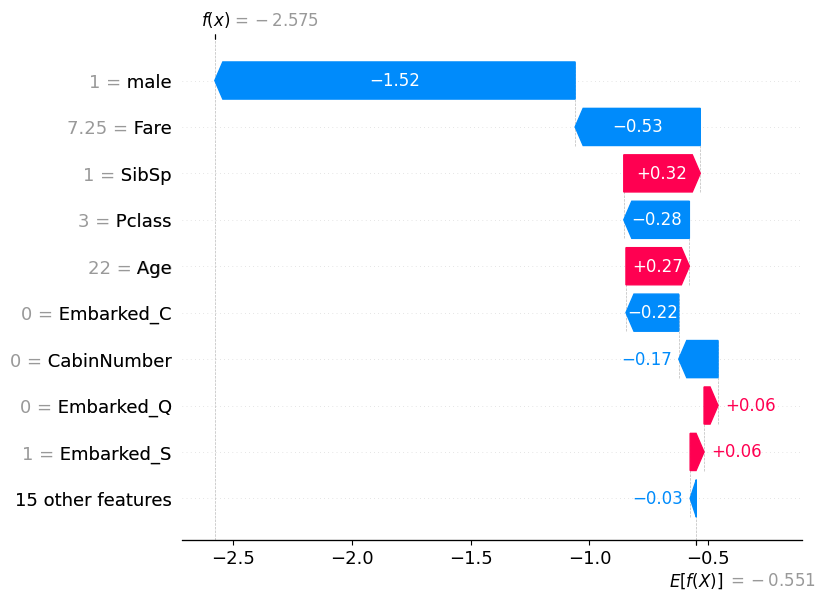

In [5]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

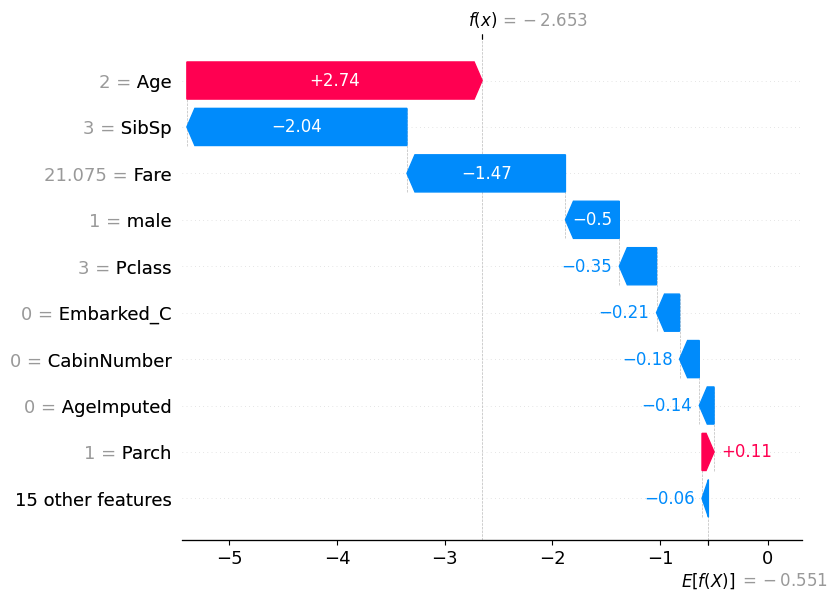

In [6]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[7])

## Force plots

In [7]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [8]:
# visualize all the predictions
shap.plots.force(shap_values)

## Dependence Plots

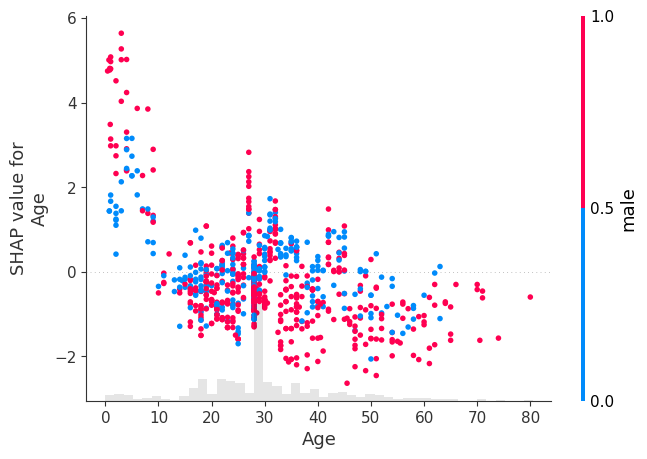

In [9]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

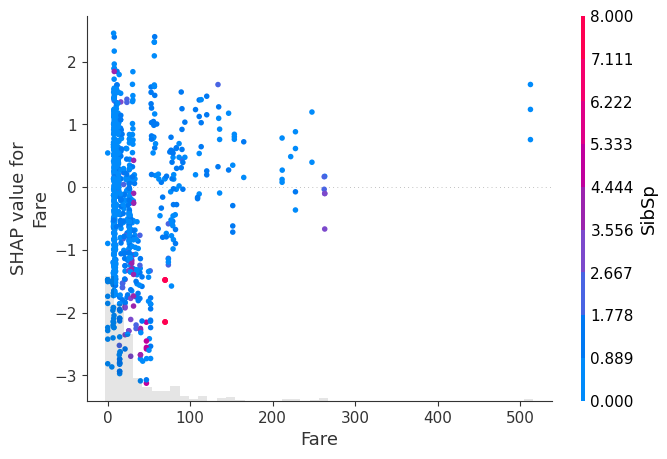

In [10]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Fare"], color=shap_values)

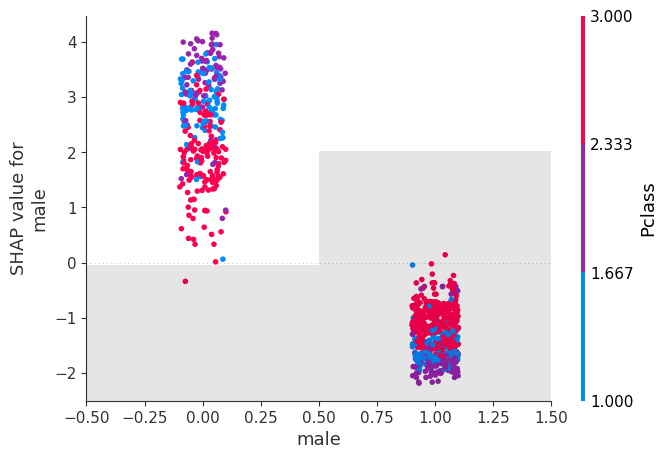

In [11]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

## Beeswarm

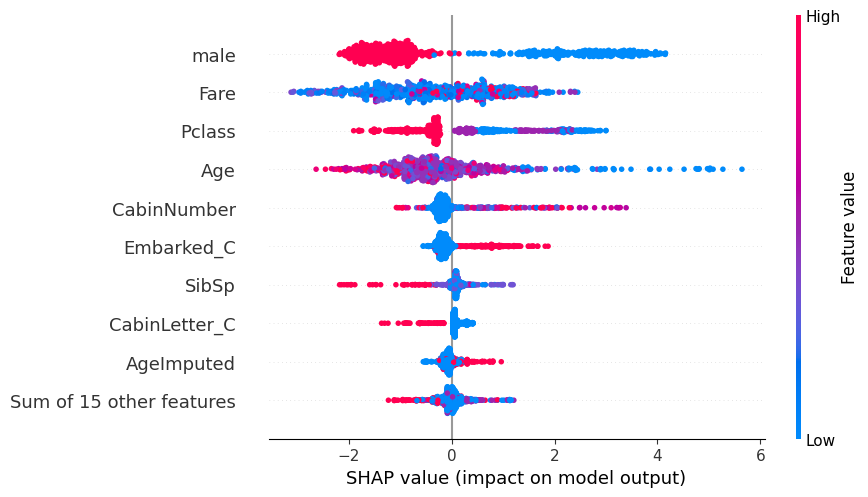

In [12]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## Bar

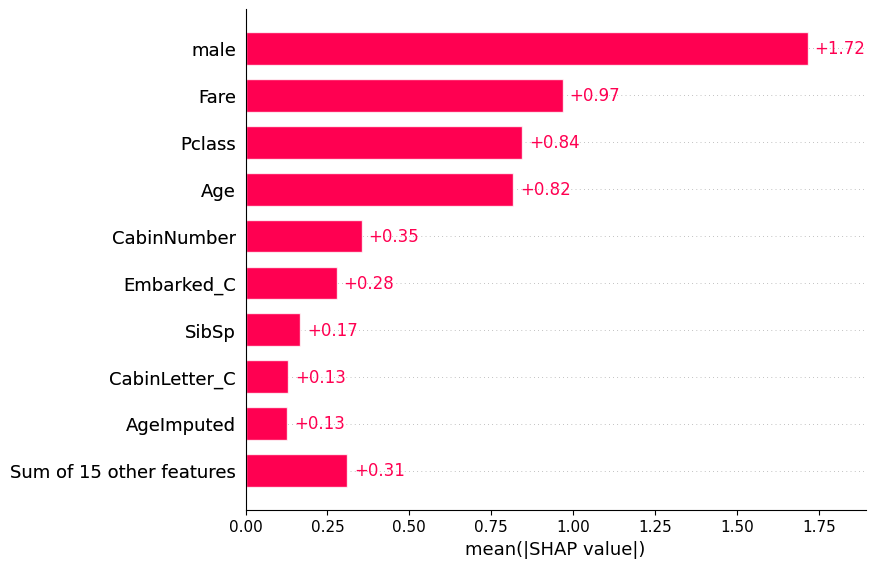

In [13]:
shap.plots.bar(shap_values)

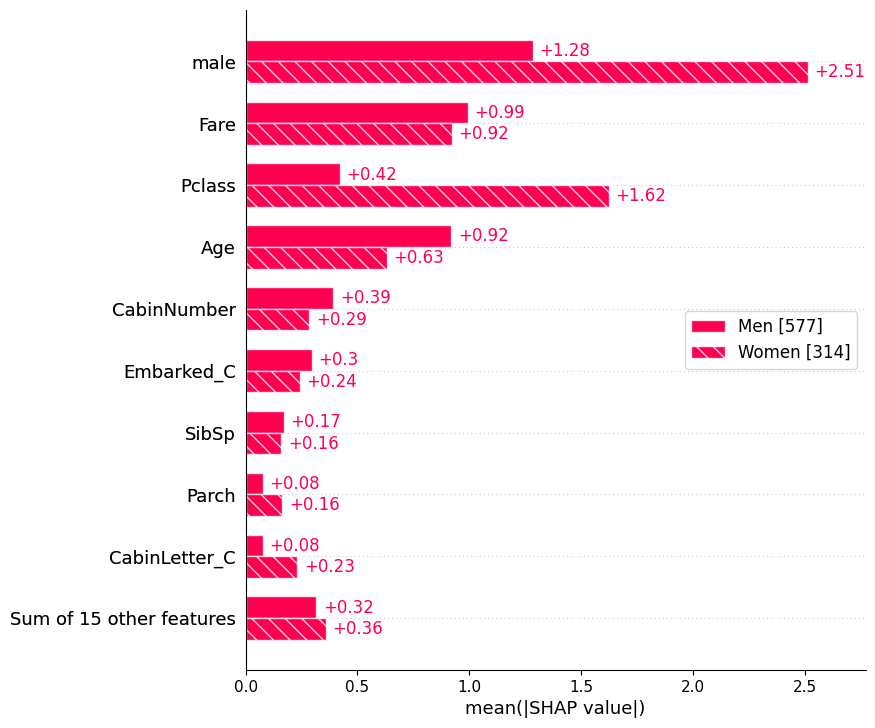

In [24]:
sex = ["Women" if shap_values[i, "male"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

Plot the bars for an individual.

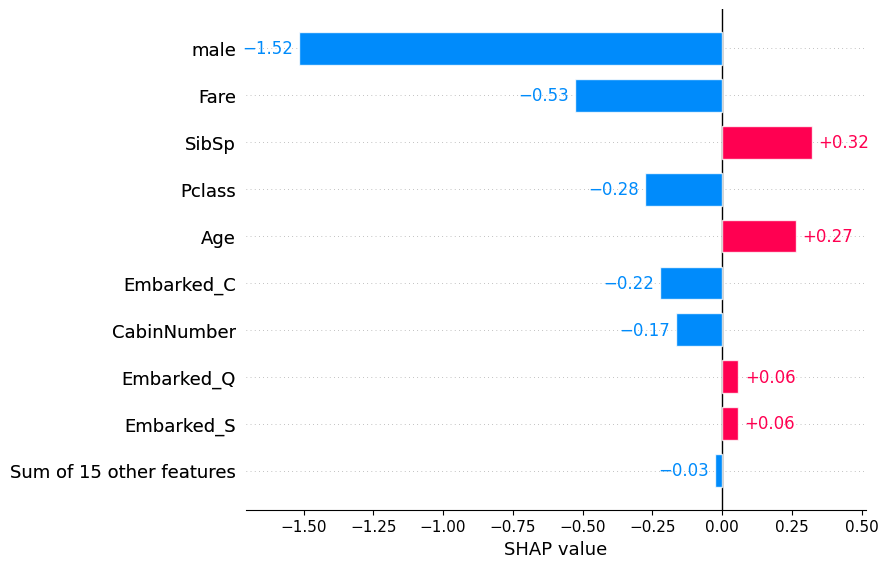

In [25]:
shap.plots.bar(shap_values[0])

# Comparison between KernelExplainer and TreeExplainer

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
kernel_explainer = shap.KernelExplainer(model.predict_proba, data=shap.utils.sample(X_test, 100))
shap_values_kernel = kernel_explainer(X_test)


TypeError: KernelExplainer.__call__() got an unexpected keyword argument 'n_samples'

In [26]:
tree_explainer = shap.TreeExplainer(model)
shap_values_tree = tree_explainer(X)

shap_values_tree

.values =
array([[-0.27582893,  0.26660144,  0.3217372 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.1510534 , -0.36999267, -0.05212411, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94937253,  0.08268124,  0.21456136, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5145619 , -1.122633  ,  0.14011872, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4761504 ,  0.93092906,  0.15789632, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28055772,  0.31930643,  0.09568977, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

.base_values =
array([-0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5507674, -0.5507674, -0.5507674, -0.5507674, -0.5507674,
       -0.5

For some datasets, the impact of tree vs kernel shap is negligible or non-existant. 

<Axes: xlabel='mean(|SHAP value|)'>

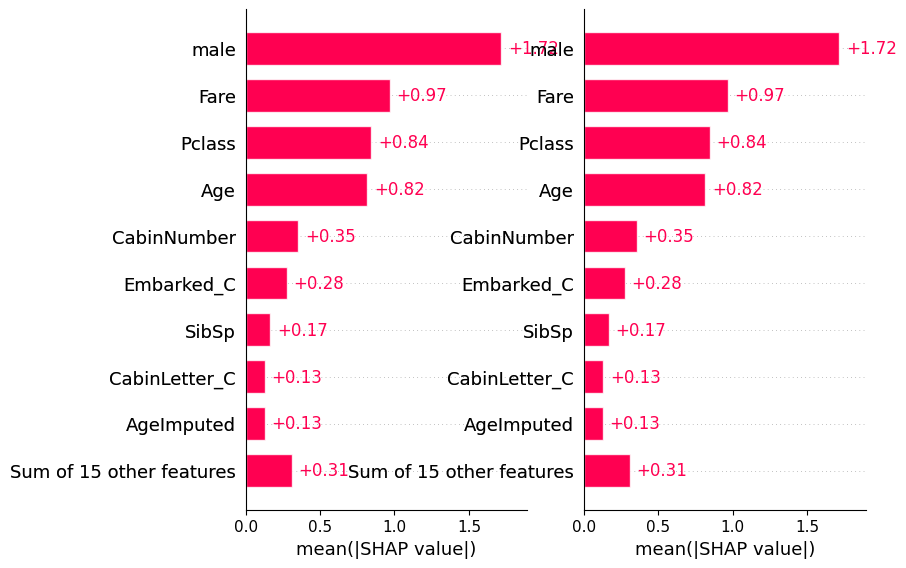

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
shap.plots.bar(shap_values, show=False)
plt.axes(ax1)
shap.plots.bar(shap_values_tree, show=False)
plt.axes(ax2)